<a href="https://colab.research.google.com/github/gitmystuff/DTSC4050/blob/main/Week_12-Classification_I/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12: Classification

Your Name

## Getting Started

* Colab - get notebook from gitmystuff DTSC4050 repository
* Save a Copy in Drive
* Remove Copy of
* Edit name
* Take attendance
* Clean up Colab Notebooks folder
* Submit shared link

## Gradio

* Check out Gradio - https://www.gradio.app/

## Review

* The Rs - https://github.com/gitmystuff/DSChunks/blob/main/R-Squared%2C%20R%2C%20r%2C%20TSS%2C%20ESS%2C%20and%20RSS.ipynb
* Uniform distribution (discrete variables) - https://www.investopedia.com/terms/u/uniform-distribution.asp
* Normal distribution - https://www.mathsisfun.com/data/standard-normal-distribution.html
* Standard normal distribution (-3 - 3)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=5)
df = pd.DataFrame(data=X)
print(df.head())
df.describe()

          0         1         2         3         4
0  0.402902  0.960903 -0.870188 -0.419200  1.520967
1  1.064328 -0.364877 -0.796369 -1.791535  0.132643
2 -0.154708 -0.446160  1.865299 -0.080931  0.499125
3 -0.033197 -1.077033  1.169030  2.493238 -0.091310
4  0.592281 -0.513239  0.022820  0.466411  0.280354


,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.036452,-0.035556,-0.003842,-0.008361,-0.055521
std,0.965858,1.001163,0.985551,0.957921,1.020080
min,-4.091841,-3.286912,-3.055051,-2.713844,-3.847997
25%,-0.631097,-0.714862,-0.661674,-0.628731,-0.726941
50%,-0.048880,-0.001409,0.009109,-0.012733,-0.018620
75%,0.612405,0.643901,0.644719,0.656083,0.618010
max,3.265404,3.820195,3.023975,2.917924,3.056094


## Binary Logistic Regression

### Linear Regression

$y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$

          x          y
0 -0.326512 -25.150605
1 -0.522020  -5.470236
2 -0.551027 -10.546930
3  0.884829  40.679828
4 -0.345267  -5.599149

 Dataframe after scaling
          x         y
0 -0.320566 -0.590245
1 -0.506339 -0.154883
2 -0.533902 -0.267187
3  0.830459  0.866033
4 -0.338387 -0.157734

x, y scatter plot with line of best fit as per our line equation
y = -0.09693279422457744 + 0.8816270278336275X


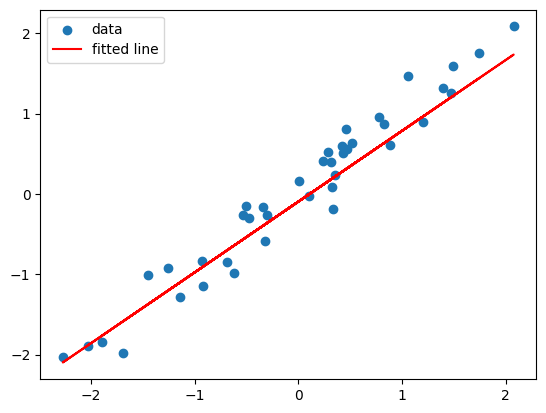

In [ ]:
# create and train the model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=50, n_features=1, noise=10)
df = pd.DataFrame(data=X, columns=['x'])
df['y'] = y
print(df.head())

scaler = StandardScaler()
df[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])
print('\n Dataframe after scaling')
print(df.head())

# decision threshold = .5
df['class'] = df['y'].apply(lambda x: 0 if x <= 0 else 1)

X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# test set prediction results
predictions = model.predict(X_test)
print('\nx, y scatter plot with line of best fit as per our line equation')
print(f'y = {model.intercept_} + {model.coef_[0]}X')

plt.scatter(X_train['x'], y_train, label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
# plt.axhline(0.5, color='green', linestyle='dashed', label='threshold')
plt.legend();

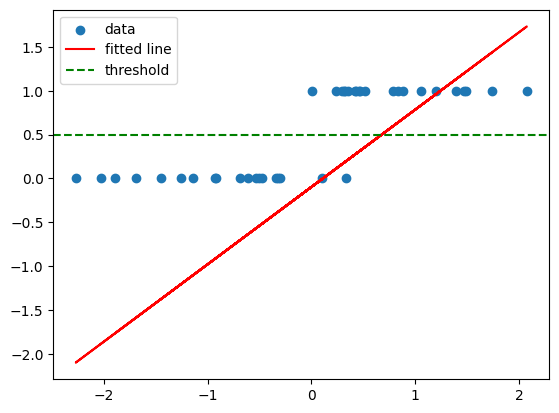

In [ ]:
# does a line of best fit over a binary dependent variable make sense?
plt.scatter(X_train['x'], X_train['class'], label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
plt.axhline(.5, color='green', linestyle='dashed', label='threshold')
# plt.axvline(0, color='gray', label='y=0')
plt.legend();

### The Sigmoid

Sigmoid curves are common in statistics as cumulative distribution functions (which go from 0 to 1), such as the integrals of the logistic density, the normal density, and Student's t probability density functions. The logistic sigmoid function is invertible, and its inverse is the logit function.

https://en.wikipedia.org/wiki/Sigmoid_function

Sigmoidal growth is a modification of exponential growth in which the percent change gets smaller as the population approaches the carrying capacity.

http://matcmath.org/textbooks/quantitativereasoning/sigmoidal-growth/

          x  class
0 -0.320566      0
1 -0.506339      0
2 -0.533902      0
3  0.830459      1
4 -0.338387      0

An S curve that is bound by 1 and 0


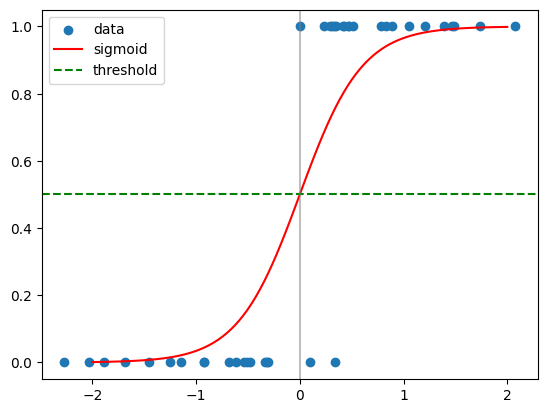

In [ ]:
# what we'd really like
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# df with x and class
print(df.drop('y', axis=1).head())

x = np.linspace(-2, 2, 100)
s = .3 # scale parameter
print('\nAn S curve that is bound by 1 and 0')
plt.scatter(X_train['x'], X_train['class'], label='data')
plt.plot(x, 1 / (1 + np.exp(-(np.mean(x)/s + (1/s)*x))), color='red', label='sigmoid')
plt.axhline(.5, color='green', linestyle='dashed', label='threshold')
plt.axvline(0, color='gray', alpha=0.5)
plt.legend()
plt.show()

### Probability

Probability = observed outcomes/possible outcomes

$P(y=1) = \beta_0 + \beta_1 X$

The probability of y = 1 is determined by a threshold and in this equation, x is unbounded, $(-\infty, +\infty)$, on the x axis, but y is either 0 or 1, and not very informative in regards to x and our threshold. With binary classification we want to show a better relationship with x.

### What is this Thing Called Threshold?

Logistic regression returns a probability. You can use the returned probability "as is" (for example, the probability that the user will click on this ad is 0.00023) or convert the returned probability to a binary value (for example, this email is spam).

A logistic regression model that returns 0.9995 for a particular email message is predicting that it is very likely to be spam. Conversely, another email message with a prediction score of 0.0003 on that same logistic regression model is very likely not spam. However, what about an email message with a prediction score of 0.6? In order to map a logistic regression value to a binary category, you must define a classification threshold (also called the decision threshold). A value above that threshold indicates "spam"; a value below indicates "not spam." It is tempting to assume that the classification threshold should always be 0.5, but thresholds are problem-dependent, and are therefore values that you must tune.

https://developers.google.com/machine-learning/crash-course/classification/thresholding

**Review our line of best fit given x and y**


x, y scatter plot with line of best fit as per our line equation
y = -0.09693279422457744 + 0.8816270278336275X


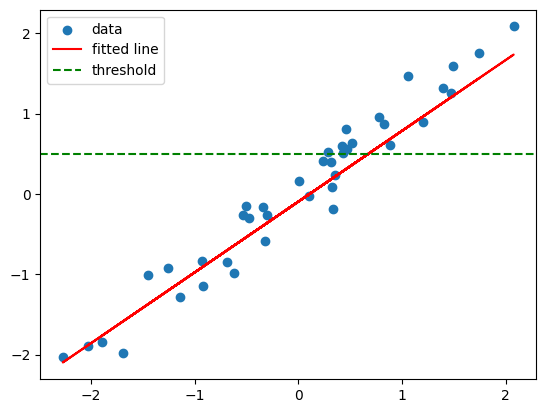

In [ ]:
print('\nx, y scatter plot with line of best fit as per our line equation')
print(f'y = {model.intercept_} + {model.coef_[0]}X')

plt.scatter(X_train['x'], y_train, label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
plt.axhline(0.5, color='green', linestyle='dashed', label='threshold')
plt.legend();

### Odds

$\large{\frac{p}{1 - p}} = \beta_0 + \beta_1 X$

Odds are positive so we have a range of 0, $+ \infty$ so we use log

In [ ]:
# https://www.statisticshowto.com/log-odds/
import pandas as pd
import math

print('Defining odds based on a probability represented by a decimals')
d = {'Probs': [.1, .2, .3, .4, .5, .6, .7, .8, .9]}
probs = pd.DataFrame(d)
probs['Odds'] = probs['Probs']/(1 - probs['Probs'])
probs.head(9)

Defining odds based on a probability represented by a decimals


,Probs,Odds
0,0.1,0.111111
1,0.2,0.250000
2,0.3,0.428571
3,0.4,0.666667
4,0.5,1.000000
5,0.6,1.500000
6,0.7,2.333333
7,0.8,4.000000
8,0.9,9.000000


### Log Odds

We use the log of odds so that we can get to $(-\infty, +\infty)$

$\large{log(\frac{p}{1 - p}}) = \beta_0 + \beta_1 X$

Now our range is unrestricted $- \infty, + \infty$ where the odds for and odds against meet at 0 with potential symmetrical range 0 to infinity. See images at https://towardsdatascience.com/https-towardsdatascience-com-what-and-why-of-log-odds-64ba988bf704

In binomial logistic regression, the dependent variable takes only two values, which can be coded 0 and 1. So, it can't be that $Y=b0+b1X$ because that could result in any value. The logit transformation solves this problem.

We take the odds to make the value continuous. We take the odds ratio to get a parameter estimate and we take the log of that ratio to make the variable range from negative infinity to infinity and be symmetric around 0 instead of 1.

Peter Flom (https://stats.stackexchange.com/users/686/peter-flom), Why $\log(\frac{p}{1-p}) = b_0+b_1x $ in Logistic regression, URL (version: 2017-09-25): https://stats.stackexchange.com/q/304844

In [ ]:
# log odds example
import math

p = .2
odds = p/(1-p)
print('.2/.8 =', odds)
print('log(.25) =', math.log(odds))

.2/.8 = 0.25
log(.25) = -1.3862943611198906


In [ ]:
# add log odds to our probs dataframe
probs['Log Odds'] = probs['Odds'].apply(lambda x: math.log(x))
probs.head(9)

,Probs,Odds,Log Odds
0,0.1,0.111111,-2.197225
1,0.2,0.250000,-1.386294
2,0.3,0.428571,-0.847298
3,0.4,0.666667,-0.405465
4,0.5,1.000000,0.000000
5,0.6,1.500000,0.405465
6,0.7,2.333333,0.847298
7,0.8,4.000000,1.386294
8,0.9,9.000000,2.197225


### Logistic Function Proof

* $p(y=1) = \beta_0 + \beta_1x$
* $\frac{p}{1 - p} = \beta_0 + \beta_1x$ # bounded by 0
* $log(\frac{p}{1 - p}) = \beta_0 + \beta_1x$ # what we want because it is unbounded
* $e^{ln[\frac{p}{1-p}]} = e^{\beta_0 + \beta_1x}$
* $\frac{p}{1-p} = e^{\beta_0 + \beta_1x}$
* $p = e^{\beta_0 + \beta_1x} - pe^{\beta_0 + \beta_1x}$
* $= p[\frac{e^{\beta_0 + \beta_1x}}{p} - e^{\beta_0 + \beta_1x}]$
* $p[1 + e^{\beta_0 + \beta_1x}] = e^{\beta_0 + \beta_1x}$
* $= \frac{e^{\beta_0 + \beta_1x}}{1 + e^{\beta_0 + \beta_1x}}$
* $= \large{\frac{1}{1 + e^{-(\beta_0 + \beta_1x + ...)}}}$
* $= \large{\frac{1}{1 + e^{-(x)}}}$

### Why the Exponential

Exponentials are also used to express growth which is instrumental with the sigmoid function. The function $y = e^x$ gives a curve at which the slope at any value x is also the value of y, which means the derivative is equal to the function itself, or $f'(x) = e^x$ and $f(x) = e^x$.

https://www.ml-science.com/eulers-number

### Summary

Logistic functions are used in logistic regression to model how the probability $p$ of an event may be affected by one or more explanatory variables: an example would be to have the model $p = f(a + bx)$, where $x$ is the explanatory variable, $a$ and $b$ are model parameters to be fitted, and $f$ is the standard logistic function.

https://en.wikipedia.org/wiki/Logistic_function#In_statistics_and_machine_learning

* $f(x) = \large{\frac{1}{1 + e^{-(x)}}}$

https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

## Make Classification Example with 2 Features

In [ ]:
# Create dataset
import pandas as pd
from sklearn.datasets import make_classification

n = 1000 # number of observations
f = 2 # number of features
inform = 2 # number of meaningful features

# unpack X and y
features, binary_class = make_classification(n_samples=n, n_features=f,
                                             n_informative=inform, n_redundant=0,
                                             n_clusters_per_class=1, random_state=42)

# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2']
df['Class'] = binary_class
df.head()

,Feature_1,Feature_2,Class
0,0.601034,1.535353,1
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,0.753178,0.787514,1


### Logistic Model

In statistics, the logistic model (or logit model) is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination).

* $p = \large{\frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}}$

* https://en.wikipedia.org/wiki/Logistic_regression
* https://en.m.wikipedia.org/wiki/Logistic_function

In [ ]:
# get our parameters
from statsmodels.formula.api import logit

model = logit(formula='Class ~ Feature_1 + Feature_2', data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.242088
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.6507
Time:                        15:48:26   Log-Likelihood:                -242.09
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                1.283e-196
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1197      0.365      3.070      0.002       0.405       1.834
Feature_1     -0.4561      0.171     -2.673      0.008      -0.790      -0.122
Feature_2      3.4780      0.237     14.649      0.000       3.013       3.943
==============================================================================
"""

In [ ]:
import numpy as np

print(model.params)
def logistic_function(row):
    b0 = model.params.Intercept
    b1 = model.params.Feature_1
    b2 = model.params.Feature_2

    x1 = row['Feature_1']
    x2 = row['Feature_2']

    return 1 / (1 + np.exp(-(b0+(b1*x1)+(b2*x2))))

df['p'] = df.apply(logistic_function, axis=1)
df['Predicted'] =  df['p'].apply(lambda x: 0 if x < .5 else 1)
df['Odds'] = df['p']/(1 - df['p'])
df['Log Odds'] = df['Odds'].apply(lambda x: math.log(x))
df.head()

Intercept    1.119669
Feature_1   -0.456101
Feature_2    3.478029
dtype: float64


,Feature_1,Feature_2,Class,p,Predicted,Odds,Log Odds
0,0.601034,1.535353,1,0.997945,1,485.673902,6.185537
1,0.755945,-1.172352,0,0.035482,0,0.036788,-3.302593
2,1.354479,-0.948528,0,0.057480,0,0.060985,-2.797120
3,3.103090,0.233485,0,0.626309,1,1.676007,0.516414
4,0.753178,0.787514,1,0.971116,1,33.620678,3.515141


### Logit

A Logit function, the inverse of the logistic sigmoid, also known as the log-odds function, is a function that represents probability values from 0 to 1, and negative infinity to infinity.

* https://deepai.org/machine-learning-glossary-and-terms/logit
* https://en.m.wikipedia.org/wiki/Logit

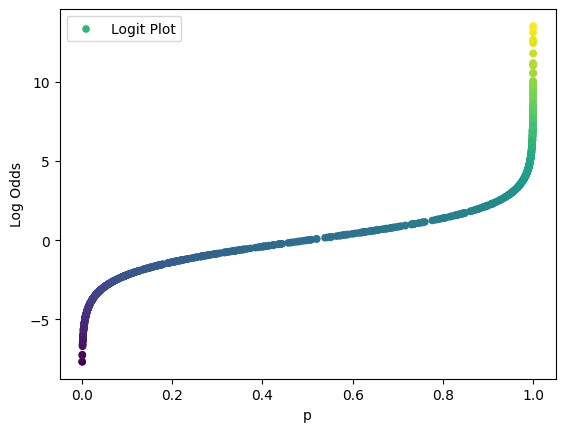

In [ ]:
# logit curve
import matplotlib.pyplot as plt

df.plot.scatter(x='p', y='Log Odds', label='Logit Plot', c=df['Log Odds'])
plt.show()

### Logit vs Sigmoid

The inverse of the logit curve is the inverse-logit or sigmoid function. The sigmoid function transforms the numbers ( -∞ to +∞ ) back to values between 0 and 1.

* https://ajaytech.co/python-logistic-regression/

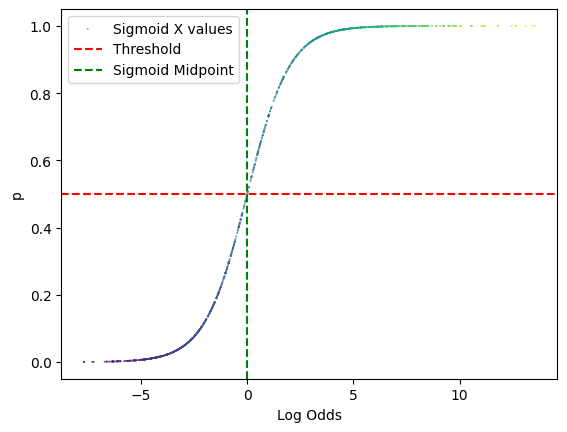

In [ ]:
import matplotlib.pyplot as plt

df.plot.scatter(x='Log Odds', y='p', marker='.', s=.5, label='Sigmoid X values', c=df['Log Odds'])
plt.axhline(y=.5, color='red', linestyle='dashed', label='Threshold')
plt.axvline(x=0, color='green', linestyle='dashed', label='Sigmoid Midpoint')
plt.legend()
plt.show()

* Logistic regression algorithm: $f(x) = \large{\frac{1}{1 + e^{-x}}}$
* x = $\beta_0 + \beta_1X_1 + \beta_2X_2$
* If $x > 0$ then $\frac{1}{1 + e^{-x}} > .5$
* If $x < 0$ then $\frac{1}{1 + e^{-x}} < .5$

## Common Functions Used in Data Science

https://deeplearningcourses.com/c/calculus-data-science

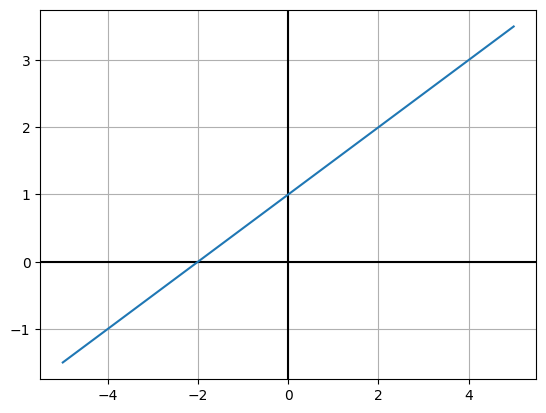

In [ ]:
# the line
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = 0.5 * x + 1
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

### Quadratic

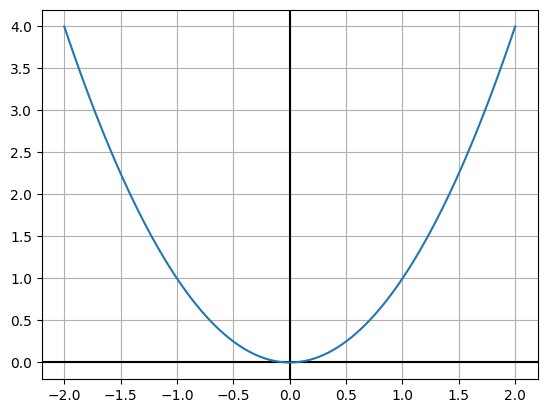

In [ ]:
# quadratic
x = np.linspace(-2, 2, 100)
y = x ** 2
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

### Exponential

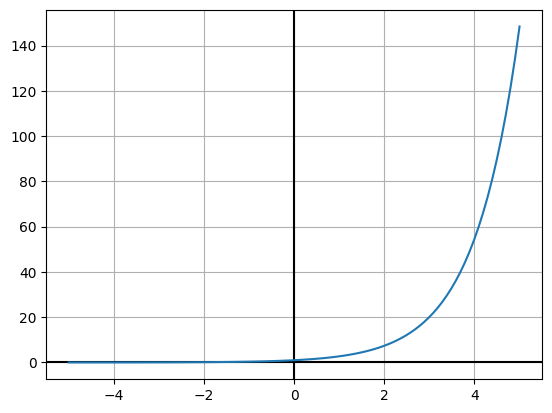

In [ ]:
# exponential
x = np.linspace(-5, 5, 100)
y = np.exp(x)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

### Log Base e

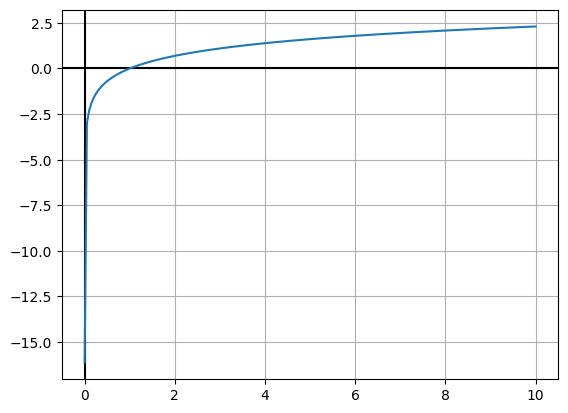

In [ ]:
# log base e (natural log)
x = np.linspace(0.0000001, 10, 200)
y = np.log(x)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

### Trigonometric

https://www.mathsisfun.com/algebra/trigonometry-index.html

<img src='https://www.mathsisfun.com/algebra/images/sin-cos-tan.svg' alt='sin cos tan' />

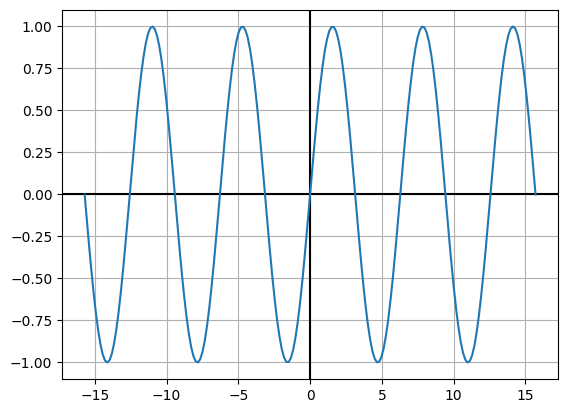

In [ ]:
# sine
x = np.linspace(-5 * np.pi, 5 * np.pi, 200)
y = np.sin(x)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

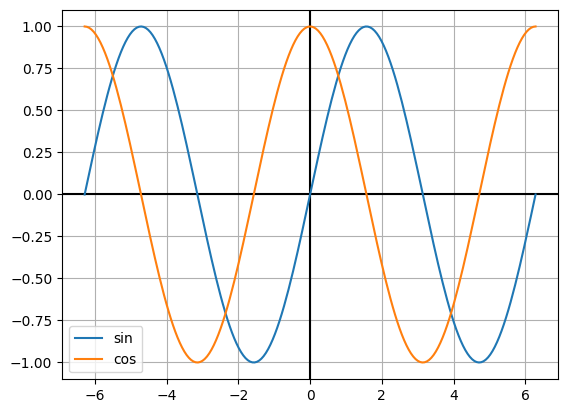

In [ ]:
# cosine
x = np.linspace(-2 * np.pi, 2 * np.pi, 200)
y = np.sin(x)
y2 = np.cos(x)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y, label='sin');
plt.plot(x, y2, label='cos');
plt.legend();

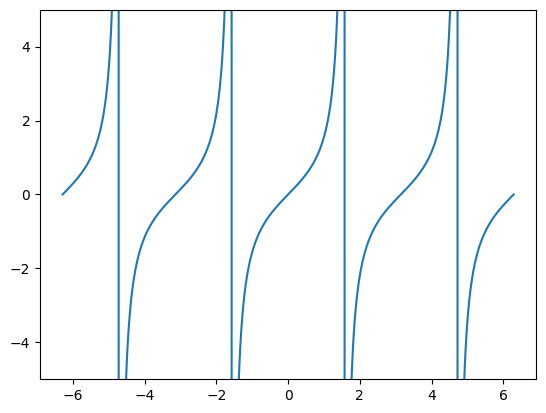

In [ ]:
# tan - https://stackoverflow.com/questions/54505852/how-to-plot-tanx-with-pyplot-and-numpy
# sin / cos
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
plt.plot(x, np.tan(x))
plt.ylim(-5, 5);

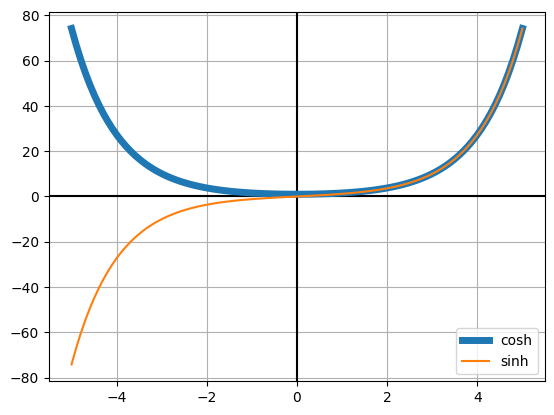

In [ ]:
# sinh and cosh (hyperbolic)
x = np.linspace(-5, 5, 100)
y = np.sinh(x)
y2 = np.cosh(x)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y2, label='cosh', linewidth=5);
plt.plot(x, y, label='sinh');
plt.legend();

## The Confusion Matrix

Suppose we have some tabular data and each observation is labeled either a 0 or 1. Our goal is to create a model and predict whether new data will be labelled a 0 or a 1.

**True Positive (TP)**: An outcome that is labeled 1 and in reality is a 1

**False Positive (FP)**: An outcome that labeled 1 and in reality is a 0

**True Negative (TN)**: An outcome that is labeled 0 and in reality is a 0

**False Negative (FN)**: An outcome that is labeled 0 and in reality is a 1

**Accuracy**: (TP + TN) / (TP + FP + TN + FN)

**Precision**: TP / (TP + FP), a measure of quality

**Recall**: TP / (TP + FN), a measure of quantity

### Type I and Type II Errors

https://towardsdatascience.com/statistics-for-data-scientists-f2456d26c5a5

Type I Error means rejecting the True null hypothesis and accepting the alternate hypothesis. It is a false positive. A smoke detector detecting smoke when there is no smoke.
Type II Error means accepting the null hypothesis when an alternate hypothesis is true. It is a false negative. When fire alarm fails to detect fire.

### Alpha and Beta Level

Alpha level is also known as the significance level, α. It is the probability of making the wrong decision,i.e., rejecting the null hypothesis when it is true. Low alpha levels mean that we need strong evidence to be able to reject the null hypothesis. This means that alpha level of 1% requires more statistical evidence than 5%.

Why is 0.05 (5%) used as significance level so commonly?

The smaller the alpha level, the little is the chance to reject True Null hypothesis. And, also the smaller is the chance to reject the False null hypothesis, because of the tiny area. The more you try to avoid Type I Error, the more you are likely to make a Type II Error.

A confidence level is 1 - α, which means accepting the null hypothesis when it is True.
Beta level means the probability of making a Type II Error, i.e., rejecting the Alternate hypothesis when it is True.

### Confustion Matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix)... It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table). They provide our True Negatives, False Positives, False Negatives, and True Positives, from which we derive Accuracy, Precision, and Recall.

https://en.wikipedia.org/wiki/Confusion_matrix

**Note**: Because of the of the output sklearn provides, we will structure our table different from what Wikipedia says.

Confused? Please be aware of the distinction. In this course we will be using the sklearn matrix. There is a way to change the rows and columns to match Wikipedia's matrix by adding labels: confusion_matrix(y_test, predictions, labels=\[1, 0\]).

In [ ]:
# Create dataset
n = 1000 # number of observations
f = 2 # number of features
inform = 2 # number of meaningful features
features, binary_class = make_classification(n_samples=n, n_features=f,
                                             n_informative=inform, n_redundant=0,
                                             n_clusters_per_class=1, random_state=13)

# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2']
df['Target'] = binary_class
df.head()

,Feature_1,Feature_2,Target
0,-1.355723,0.932216,0
1,-1.448966,0.628289,0
2,-0.259349,-0.792658,0
3,0.815272,-0.205096,1
4,1.430197,1.342170,1


In [ ]:
# X_train, X_test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.20)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Create model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

**The Solver (liblinear)**: Solvers are used to minimize the loss function which in turn provides our best coefficients. Please see the documentation to learn about the five different solvers.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [ ]:
# View confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print()
print('Here is what the numbers represent from the sklLearn output')
print('''
                 predicted
                   |  0  |  1
           --------------------
           class 0 | TN  |  FP
  actual   --------------------
           class 1 | FN  |  TP
''')
print()
print('Here is what the numbers represent from the Wikipedia article')
print('''
                 actual
                   |  1  |  0
           --------------------
           class 1 | TP  |  FP
predicted  --------------------
           class 0 | FN  |  TN
''')

Confusion Matrix
[[90 10]
 [ 9 91]]

Here is what the numbers represent from the sklLearn output

                 predicted
                   |  0  |  1
           --------------------
           class 0 | TN  |  FP
  actual   --------------------
           class 1 | FN  |  TP


Here is what the numbers represent from the Wikipedia article

                 actual
                   |  1  |  0
           --------------------
           class 1 | TP  |  FP
predicted  --------------------
           class 0 | FN  |  TN



In [ ]:
# Compare with crosstab
pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,90,10,100
1,9,91,100
All,99,101,200


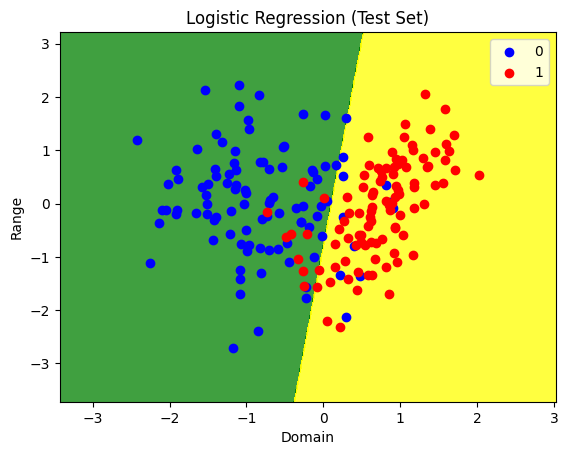

In [ ]:
# review our plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'yellow')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'red'))(i), label = j)

plt.title('Logistic Regression (Test Set)')
plt.xlabel('Domain')
plt.ylabel('Range')
plt.legend()
plt.show()

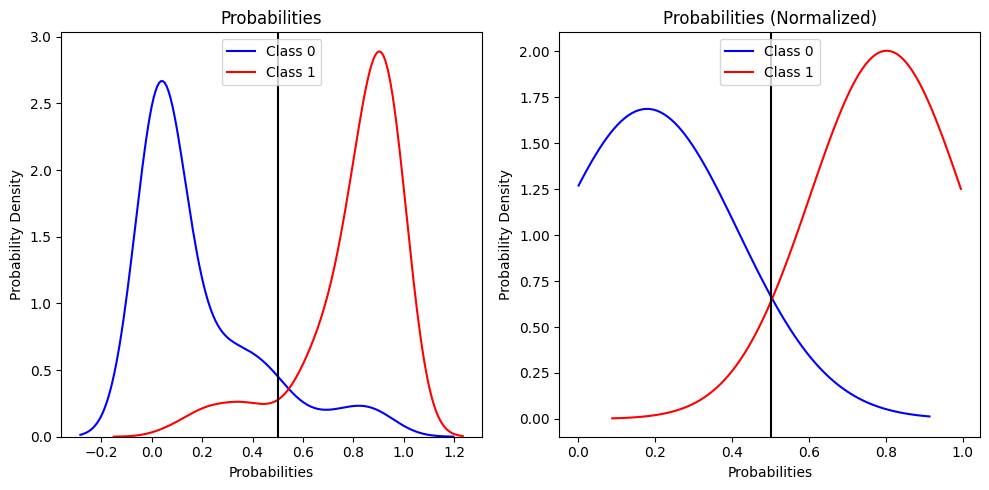

In [ ]:
# Compare KDE plots for probabilities and normed probabilities
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

probs=model.predict_proba(X_test)[:,1]
sns.kdeplot(probs[y_test==0], shade=False, color='blue', label='Class 0', ax=ax1);
sns.kdeplot(probs[y_test==1], shade=False, color='red', label='Class 1', ax=ax1);
ax1.axvline(x=.5, color='black')
ax1.set_title('Probabilities')
ax1.set(xlabel='Probabilities', ylabel='Probability Density')

mean = probs[y_test==0].mean()
std = probs[y_test==0].std()
x = np.linspace(probs[y_test==0].min(), probs[y_test==0].max(), 100)
y = scipy.stats.norm.pdf(x,mean,std)
ax2.plot(x, y, color='blue', label='Class 0')

mean = probs[y_test==1].mean()
std = probs[y_test==1].std()
x = np.linspace(probs[y_test==1].min(), probs[y_test==1].max(), 100)
y = scipy.stats.norm.pdf(x,mean,std)
ax2.plot(x, y, color='red', label='Class 1')

x_threshold = 0.5
ax2.axvline(x=x_threshold,color='black')

ax2.set_title('Probabilities (Normalized)')
ax2.set(xlabel='Probabilities', ylabel='Probability Density')

ax1.legend(loc='upper center')
ax2.legend(loc='upper center')
plt.tight_layout()
plt.show()

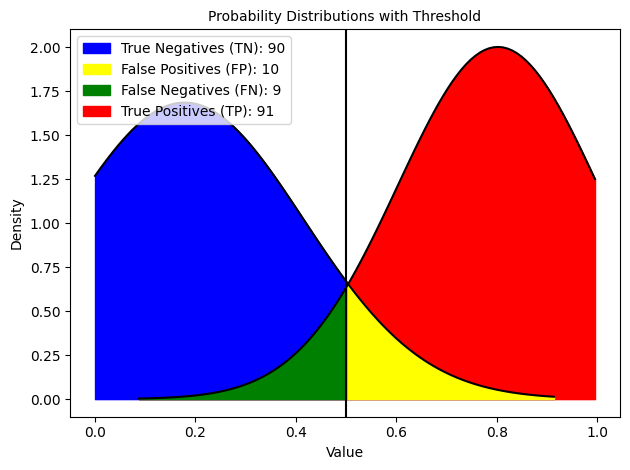

In [ ]:
# visualize TN, FN, FP, TP
import math
import matplotlib.patches as mpatches

x_threshold = 0.5
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

mean_0 = probs[y_test==0].mean()
std_0 = probs[y_test==0].std()
x_0 = np.linspace(probs[y_test==0].min(), probs[y_test==0].max(), 100)
y_0 = scipy.stats.norm.pdf(x_0,mean_0,std_0)

mean_1 = probs[y_test==1].mean()
std_1 = probs[y_test==1].std()
x_1 = np.linspace(probs[y_test==1].min(), probs[y_test==1].max(), 100)
y_1 = scipy.stats.norm.pdf(x_1,mean_1,std_1)

plt.plot(x_0, y_0, color='black')
plt.fill_between(x_0, y_0, color='blue', alpha=1)

plt.plot(x,y, color='black')
plt.fill_between(x_1, y_1, color='red', alpha=1)

ptx_0 = np.linspace(x_threshold, probs[y_test==0].max(), 100)
pty_0 = scipy.stats.norm.pdf(ptx_0,mean_0,std_0)
plt.fill_between(ptx_0, pty_0, color='yellow', alpha=1)

ptx_1 = np.linspace(probs[y_test==1].min(), x_threshold, 100)
pty_1 = scipy.stats.norm.pdf(ptx_1,mean_1,std_1)
plt.fill_between(ptx_1, pty_1, color='green', alpha=1)

tn_patch = mpatches.Patch(color='blue', label='True Negatives (TN): ' + str(tn))
fp_patch = mpatches.Patch(color='yellow', label='False Positives (FP): ' + str(fp))
fn_patch = mpatches.Patch(color='green', label='False Negatives (FN): ' + str(fn))
tp_patch = mpatches.Patch(color='red', label='True Positives (TP): ' + str(tp))
plt.legend(handles=[tn_patch,fp_patch,fn_patch,tp_patch], loc=2)

plt.title('Probability Distributions with Threshold',fontsize=10)
plt.axvline(x=x_threshold,color='black')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()

### Underfitting and Overfitting

In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably". An overfitted model is a statistical model that contains more parameters than can be justified by the data.

<img src='https://docs.aws.amazon.com/images/machine-learning/latest/dg/images/mlconcepts_image5.png' alt='underfitting overfitting' />

https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

If you're overfitting, or you are getting great training scores and poor  test scores, you might be overfitting so try removing the lesser performing features. The model is just memorizing the training data.

Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data. An under-fitted model is a model where some parameters or terms that would appear in a correctly specified model are missing.[2] Under-fitting would occur, for example, when fitting a linear model to non-linear data. Such a model will tend to have poor predictive performance.

If you're underfitting, or you are getting poor training scores and test scores, you might be underfitting so try adding more data or more features.

https://en.wikipedia.org/wiki/Overfitting

### Bias Variance Tradeoff

In statistics and machine learning, the bias–variance tradeoff is the property of a model that the variance of the parameter estimates across samples can be reduced by increasing the bias in the estimated parameters. The bias–variance dilemma or bias–variance problem is the conflict in trying to simultaneously minimize these two sources of error that prevent supervised learning algorithms from generalizing beyond their training set.

https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

Please become familiar with this image:

<img src='https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg' alt='bias variance tradeoff' />

Please read the article responsible for the image:

https://www.kdnuggets.com/2016/08/bias-variance-tradeoff-overview.html

#### A Formula

$E[(\hat{y} - y)^2] = E[(\hat{y} - E[\hat{y})^2] + (E[\hat{y}] - y)^2$
<br />MSE = Variance + Bias^2
* where y = given y, (ground truth)
* $\hat{y}$ = prediction
* $E[\hat{y}]$ = expected value or average of predictions
* error = $\frac{fp + fn}{total}$
* Bias = error in training
* Variance = range of predictions, how much an estimate of the target function will change if different data was is

<table width='50%' style='margin-right: 100%'>
    <tr>
        <td>Training Error</td>
        <td>1%</td>
        <td>15%</td>
        <td>16%</td>
        <td>1%</td>
    </tr>
    <tr>
        <td>Testing Error</td>
        <td>15%</td>
        <td>16%</td>
        <td>33%</td>
        <td>1%</td>
    </tr>
    <tr>
        <td></td>
        <td>lo bias</td>
        <td>hi bias</td>
        <td>hi bias</td>
        <td>lo bias</td>
    </tr>
    <tr>
        <td></td>
        <td>hi var</td>
        <td>lo var</td>
        <td>hi var</td>
        <td>lo var</td>
    </tr>
</table>

https://www.mastersindatascience.org/learning/difference-between-bias-and-variance/

### The Classification Report for Imbalanced Data Sets

Both the titanic and cancer datasets weren't as balanced as they could be but to appreciate the implications of an imbalanced dataset, consider a fraudualent credit card dataset where there may be a 1 (for fraudulent activity) per 1000 0s of normal activity. We wouldn't need to build a predictive model to make correct predictions 99% of the time. The data itself lets us do that. We need metrics that tell us that the model we build is learning about the relevant data and that it predicts what it is suppose to predict. This gets back to our Precision Recall Tradeoff.

**Precision**: The sum of observations correctly classified as positive out of the total observations classified as positive. From the formula, tp / (tp + fp), we can see we want to mimimize fp (false positives), or type I errors, which is sounding an alarm when there is no fire.

**Recall**: The sum of observations correctly classified as positive out of the total actual positives. From the forumula, tp / (tp + fn), we can see we want to minimize fn (false negatives), or type II errors, which is not sounding an alarm when there is a fire.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[90 10]
 [ 9 91]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       100
           1       0.90      0.91      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



* precision 0: 114 / 137
* precision 1: 66 / 86
* recall 0: 114 / 134
* recall 1: 66 / 89

We know about accuracy, precision, and recall and we've talked about f1-score as being the harmonic mean of precision and recall (f1 score = 2 * (precision * recall) / (precision + recall)).

* support: the number of observations labeled 0 or 1 (remember the pie chart we made of the target?)
* macro avg: the average between the two classes (e.g. (prec 0 + prec 1) / 2
* weighted avg: the average between the two classes taking into account the number of their observations (e.g. ((prec0 * score0) + (prec 1 * score1)) / total)

A classification report provides a little more information by providing metrics for each class. For example, for class 0, our recall is higher than our precision, which tells us that there are fewer false negatives than false positives in class 0.

In [ ]:
import numpy as np

print((.83 + .77) / 2)
wgt_exmpl = ((.83 * 134) + (.77 * 89)) / (134 + 89)
print(np.round(wgt_exmpl, 2))

0.8
0.81


### Precision Recall Tradeoff

In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance... Accuracy can be a misleading metric for imbalanced data sets. Consider a sample with 95 negative and 5 positive values. Classifying all values as negative in this case gives 0.95 accuracy score.

https://en.wikipedia.org/wiki/Precision_and_recall

In cases of imbalanced data, precision, recall, and f1 score become useful metrics. Precision tells us the proportion of data that was predicted was actually predicted correctly. Recall, also known as the True Positive Rate, is the probability that an actual positive will be predicted to be positive.

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

https://en.wikipedia.org/wiki/Precision_and_recall

<img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*GM10sFuFBAbhwBt2scuP1g.png' alt='precision recall tradeoff' />

https://datascience-george.medium.com/the-precision-recall-trade-off-aa295faba140

The following is a visualization of our true negatives, false positives, false negatives, and true positives from the data set generated with make_classification.

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('Confusion Matrix')
print()
print(f'''
           survived predicted
                   |  0   |  1
           -----------------------  -----------------------------------------
           no      | {tn}  |  {fp}     fpr (type I error)  | tnr
  actual   -----------------------  -----------------------------------------
           yes     | {fn}   |  {tp}     tpr (recall)        | fnr (type II error)

                    for   | precision
           ----------------------------
                    npv   | fdr

''')

Confusion Matrix


           survived predicted
                   |  0   |  1
           -----------------------  -----------------------------------------
           no      | 90  |  10     fpr (type I error)  | tnr
  actual   -----------------------  -----------------------------------------
           yes     | 9   |  91     tpr (recall)        | fnr (type II error)

                    for   | precision
           ----------------------------
                    npv   | fdr




### Metrics

* tn = pred 0 actual 0
* fp = pred 1 actual 0
* fn = pred 0 actual 1
* tp = pred 1 actual 1
* acc(uracy) = $\frac{tn + tp}{total}$
* error = $\frac{fp + fn}{total}$
* prev(alence) = $\frac{fn + tp}{total}$
* queue = $\frac{fp + tp}{total}$
* tpr = $\frac{tp}{tp + fn}$
    * true positive rate
    * recall
    * sensitivity
    * prob of detection
    * 1 - fnr
* fnr = $\frac{fn}{tp + fn}$
    * false negative rate
    * type II error
    * 1 - tpr
* tnr = $\frac{tn}{tn + fp}$
    * true negative rate
    * specificity
    * 1 - fpr
* fpr = $\frac{fp}{tn + fp}$
    * false positive rate
    * type I error
    * fall out
    * prob of false claim
    * 1 - tnr
* ppv = $\frac{tp}{tp + fp}$
    * positive predicted value
    * precision
    * 1 - fdr
* fdr = $\frac{fp}{tp + fp}$
    * false discovery rate
    * 1 - ppv
* npv = $\frac{tn}{tn + fn}$
    * negative predicted value
    * 1 - for
* for = $\frac{fn}{tn + fn}$
    * false omission rate
    * 1 - npv
* liklihood ratio+ (lr+) = $\frac{tpr}{fpr}$
    * roc
* liklihood ratio- (lr-) = $\frac{fnr}{tnr}$
* diagnostic odds ratio = $\frac{lr+}{lr-}$
* f1 score = 2 * $\frac{precision-recall}{precision+recall}$
* Youden's J = sensitivity + specificity - 1 = tpr - fpr
* Matthew's Correlation Coefficient = $\frac{(tp*tn)-(fp*tp)}{\sqrt{(tp+fp)(tp+fn)(tn+fp)(tn+fn)}}$
  

## Model Comparisons

In [ ]:
# get data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

comparisons = pd.read_csv('https://raw.githubusercontent.com/sudarshan-koirala/K-Nearest-Neighbors-Social-Network-Ads/master/Social_Network_Ads.csv')
print(comparisons.shape)
print(comparisons.head())
print(comparisons.info())

(400, 5)
    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
None


In [ ]:
# get X and y and train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(comparisons.drop(['User ID', 'Gender', 'Purchased'], axis=1),
                                                    comparisons.Purchased,
                                                    test_size=0.2, random_state=42)

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

## Logistic Regression

[[50  2]
 [ 9 19]]
0.8625


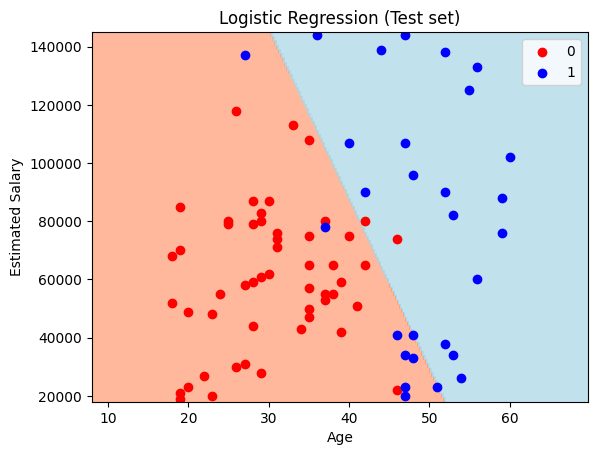

In [ ]:
# model, predict, evaluate, and plot
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightsalmon', 'lightblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Multinomial Logistic Regression

See Week 10 - Multinomial Logistic Regression

## K Nearest Neighbor

* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#/media/File:KnnClassification.svg
* Choose the number of K neighbors
* Within the perimeter, count the number of each class
* New data point is assigned the class with the highest count

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[48  4]
 [ 3 25]]
0.9125


## Support Vector Classifier

* https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:SVM_margin.png
* Linearly separable
* Identify the hyperplane (similar to line of best fit used in regression)
* Find the support vectors
* Maximize the margin
* Identify negative and positive hyperplanes
* Compares apples that look like oranges and vice versa that reside near the margin (support vectors)


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 9 19]]
0.8625


## SVC with Kernel

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 1 27]]
0.925


## More on Support Vectors

See Week 10 - Support Vectors

## Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 3 25]]
0.9375


## More on Naive Bayes

See Week 10 - Naive Bayes

## Decision Tree Classifier

* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

#### Terms

* Root node
* Splitting
* Decision node
* Leaf / terminal node
* Pruning
* Branch
* Parent and child nodes

#### Attribute Selection Measures

* Gini index
* Entropy
* Information gain
* Gain ratio
* Reduction in variance
* Chi-square

More next week

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[46  6]
 [ 7 21]]
0.8375


## Random Forest Classifier

* Random sample of X_train when building trees
* Random subsets of features
* Bagging

More next week

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 6 22]]
0.8625
